In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize

In [2]:
#We are working with processed world bank project data
with open('data/world_bank_projects.json') as data_file:    
    world_bank_data = json.load(data_file) #Load it up for analysis

In [3]:
#Load and check out the columns
json_df = pd.DataFrame(world_bank_data)
json_df.columns

Index(['_id', 'approvalfy', 'board_approval_month', 'boardapprovaldate',
       'borrower', 'closingdate', 'country_namecode', 'countrycode',
       'countryname', 'countryshortname', 'docty', 'envassesmentcategorycode',
       'grantamt', 'ibrdcommamt', 'id', 'idacommamt', 'impagency',
       'lendinginstr', 'lendinginstrtype', 'lendprojectcost',
       'majorsector_percent', 'mjsector_namecode', 'mjtheme',
       'mjtheme_namecode', 'mjthemecode', 'prodline', 'prodlinetext',
       'productlinetype', 'project_abstract', 'project_name', 'projectdocs',
       'projectfinancialtype', 'projectstatusdisplay', 'regionname', 'sector',
       'sector1', 'sector2', 'sector3', 'sector4', 'sector_namecode',
       'sectorcode', 'source', 'status', 'supplementprojectflg', 'theme1',
       'theme_namecode', 'themecode', 'totalamt', 'totalcommamt', 'url'],
      dtype='object')

In [4]:
#There are a lot of data, so let's remove some of them
json_df_less = json_df[['boardapprovaldate',
                        'countryname', 'countryshortname',
                        'mjtheme_namecode', 'project_name',
                        'totalamt']]
json_df_less.head(5)

,boardapprovaldate,countryname,countryshortname,mjtheme_namecode,project_name,totalamt
0,2013-11-12T00:00:00Z,Federal Democratic Republic of Ethiopia,Ethiopia,"[{'code': '8', 'name': 'Human development'}, {...",Ethiopia General Education Quality Improvement...,130000000
1,2013-11-04T00:00:00Z,Republic of Tunisia,Tunisia,"[{'code': '1', 'name': 'Economic management'},...",TN: DTF Social Protection Reforms Support,0
2,2013-11-01T00:00:00Z,Tuvalu,Tuvalu,"[{'code': '5', 'name': 'Trade and integration'...",Tuvalu Aviation Investment Project - Additiona...,6060000
3,2013-10-31T00:00:00Z,Republic of Yemen,"Yemen, Republic of","[{'code': '7', 'name': 'Social dev/gender/incl...",Gov't and Civil Society Organization Partnership,0
4,2013-10-31T00:00:00Z,Kingdom of Lesotho,Lesotho,"[{'code': '5', 'name': 'Trade and integration'...",Second Private Sector Competitiveness and Econ...,13100000


#### Let us find the 10 countries with the most projects

In [5]:
#Top ten countries with most projects
json_df_less['countryname'].value_counts().head(10)

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Kingdom of Morocco                 12
Nepal                              12
People's Republic of Bangladesh    12
Republic of Mozambique             11
Africa                             11
Name: countryname, dtype: int64

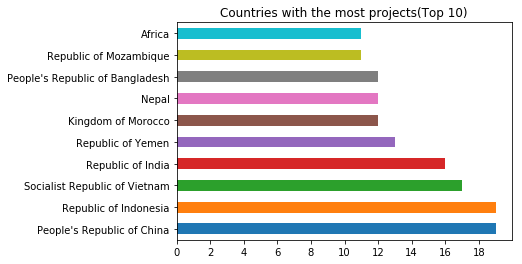

In [6]:
#Plot the data for more visualization
json_df_less['countryname'].value_counts().head(10).plot(kind='barh',
                                                         title="Countries with the most projects(Top 10)",
                                                        xticks=range(0,20,2))

#### 10 Major Project themes

In [7]:
#Top ten major project themes (Some themes are counted multiple times in a single project)
wb_df_norm = json_normalize(world_bank_data, 'mjtheme_namecode')
wb_df_norm['name'].value_counts().head(10)

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64

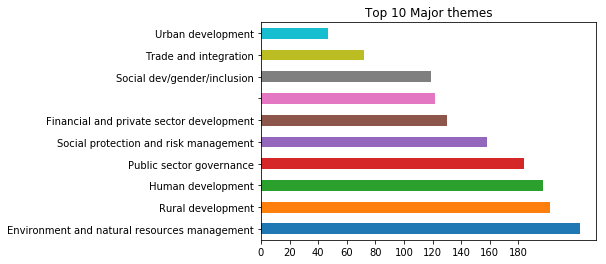

In [8]:
#Plot the data for more visualization
wb_df_norm['name'].value_counts().head(10).plot(kind='barh',
                                                         title="Top 10 Major themes",
                                                        xticks=range(0,200,20))

###### From the output above, we can see that there are 122 missing values.

In [9]:
wb_df_norm['code'].value_counts().head(10)

11    250
10    216
8     210
2     199
6     168
4     146
7     130
5      77
9      50
1      38
Name: code, dtype: int64

###### We can see that the output above shows that just the codes are available, only the names are missing

#### Create a dataframe with the missing names filled in.

In [10]:
#Manually created dictionary for comparison purposes
theme_code_dict = {'1':'Economic management',
             '2':'Public sector governance',
             '3':'Rule of law',
             '4':'Financial and private sector development',
             '5':'Trade and integration',
             '6':'Social protection and risk management',
             '7':'Social dev/gender/inclusion',
             '8':'Human development',
             '9':'Urban development',
             '10':'Rural development',
             '11':'Environment and natural resources management',
            }
#Print dict
theme_code_dict

{'1': 'Economic management',
 '2': 'Public sector governance',
 '3': 'Rule of law',
 '4': 'Financial and private sector development',
 '5': 'Trade and integration',
 '6': 'Social protection and risk management',
 '7': 'Social dev/gender/inclusion',
 '8': 'Human development',
 '9': 'Urban development',
 '10': 'Rural development',
 '11': 'Environment and natural resources management'}

In [11]:
#Non-manual version
json_norm = json_normalize(world_bank_data, 'mjtheme_namecode') #Split column into own table
jn_no_empty = json_norm[json_norm.name != ''].set_index('code')['name'] #Remove empty names 
theme_code_dict = jn_no_empty.drop_duplicates().to_dict() #Drop duplicates and convert to dictionary
theme_code_dict #Print dict

{'8': 'Human development',
 '1': 'Economic management',
 '6': 'Social protection and risk management',
 '5': 'Trade and integration',
 '2': 'Public sector governance',
 '11': 'Environment and natural resources management',
 '7': 'Social dev/gender/inclusion',
 '4': 'Financial and private sector development',
 '10': 'Rural development',
 '9': 'Urban development',
 '3': 'Rule of law'}

In [12]:
#Function to replace mjtheme name using code from dictionary
def replace_empty(theme_dict_list):
    for theme_dict in theme_dict_list:
        if theme_dict['name'] == '':
            theme_dict['name'] = theme_code_dict[theme_dict['code']]
    return theme_dict

In [13]:
filled_json_df = json_df.copy(deep=True)
filled_json_df['mjtheme_namecode'].apply(replace_empty).head(10)

0    {'code': '11', 'name': 'Environment and natura...
1    {'code': '6', 'name': 'Social protection and r...
2    {'code': '6', 'name': 'Social protection and r...
3    {'code': '7', 'name': 'Social dev/gender/inclu...
4    {'code': '4', 'name': 'Financial and private s...
5    {'code': '6', 'name': 'Social protection and r...
6    {'code': '4', 'name': 'Financial and private s...
7           {'code': '8', 'name': 'Human development'}
8    {'code': '7', 'name': 'Social dev/gender/inclu...
9    {'code': '2', 'name': 'Public sector governance'}
Name: mjtheme_namecode, dtype: object

In [14]:
#Top ten major project themes (Some themes are counted multiple times in a single project)
wb_df_clean = json_normalize(world_bank_data, 'mjtheme_namecode')
wb_df_clean['name'].value_counts().head(10)

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: name, dtype: int64

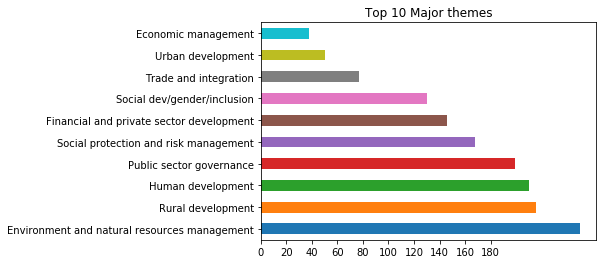

In [16]:
#Plotted after cleaning
wb_df_clean['name'].value_counts().head(10).plot(kind='barh',
                                                         title="Top 10 Major themes",
                                                        xticks=range(0,200,20))

In [15]:
json_df_less.head(5)

,boardapprovaldate,countryname,countryshortname,mjtheme_namecode,project_name,totalamt
0,2013-11-12T00:00:00Z,Federal Democratic Republic of Ethiopia,Ethiopia,"[{'code': '8', 'name': 'Human development'}, {...",Ethiopia General Education Quality Improvement...,130000000
1,2013-11-04T00:00:00Z,Republic of Tunisia,Tunisia,"[{'code': '1', 'name': 'Economic management'},...",TN: DTF Social Protection Reforms Support,0
2,2013-11-01T00:00:00Z,Tuvalu,Tuvalu,"[{'code': '5', 'name': 'Trade and integration'...",Tuvalu Aviation Investment Project - Additiona...,6060000
3,2013-10-31T00:00:00Z,Republic of Yemen,"Yemen, Republic of","[{'code': '7', 'name': 'Social dev/gender/incl...",Gov't and Civil Society Organization Partnership,0
4,2013-10-31T00:00:00Z,Kingdom of Lesotho,Lesotho,"[{'code': '5', 'name': 'Trade and integration'...",Second Private Sector Competitiveness and Econ...,13100000
